In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df_values = pd.read_excel('5_parameters_data.xlsx')

In [3]:
Belgaum_division = ['BAGALKOT', 'BELAGAVI', 'DHARAWAD', 'GADAG', 'HAVERI', 'UTTARA KANNADA', 'VIJAYAPURA']

In [4]:
Kalburgi_division = ['BALLARI', 'BIDAR', 'YADGIRI', 'RAICHUR', 'KOPPAL', 'KALABURAGI']

In [5]:
Mysore_division = ['MYSURU', 'CHAMARAJANAGAR', 'CHIKKAMAGALURU', 'DAKSHINA KANNADA', 'HASSAN', 'KODAGU', 'MANDYA', 'UDUPI']

In [6]:
Bengaluru_division = ['BENGALURU', 'BENGALURU(R)', 'CHIKKABALLAPURA', 'CHITRADURGA', 'DAVANAGERE', 'KOLAR', 'RAMANAGARA', 'SHIVAMOGGA', 'TUMAKURU']

In [7]:
division_dict = {
    'Belgaum_division': Belgaum_division,
    'Kalburgi_division': Kalburgi_division,
    'Mysore_division': Mysore_division,
    'Bengaluru_division': Bengaluru_division
}

district_to_division = {district: division for division, districts in division_dict.items() for district in districts}

df_values['Division'] = df_values['District'].map(district_to_division)

In [8]:
df_values

,District,Rice_Production_223,NetAreaIrrigated_Tanks_NetAreaIrrigated_176,NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_No_183,NetAreaIrrigatedUnderDifferentSources_LiftIrrigation_NetIrrigatedArea_185,AreaUnderCereals_Paddy_190,TotalNPK_315,Division
0,BENGALURU,3376,164,0,0,782,23310,Bengaluru_division
1,BENGALURU(R),2354,0,1,35,736,19259,Bengaluru_division
2,RAMANAGARA,12128,1688,4,425,4468,7472,Bengaluru_division
3,CHITRADURGA,4566,0,107,0,1297,35884,Bengaluru_division
4,DAVANAGERE,489505,1534,1562,6610,98259,99644,Bengaluru_division
5,KOLAR,864,0,0,0,395,22190,Bengaluru_division
6,CHIKKABALLAPURA,2698,0,21,0,1333,28357,Bengaluru_division
7,SHIVAMOGGA,384974,50951,4152,3848,109617,56609,Bengaluru_division
8,TUMAKURU,26042,8998,9,0,10379,38148,Bengaluru_division
9,CHIKKAMAGALURU,110533,6384,4075,110,33036,67863,Mysore_division


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

parameters = ['Rice_Production','Tank Irrigation', 'LiftIrrigation Count',
              'LiftIrrigation Area', 'Area (Paddy)','Total NPK']

df_values = df_values.drop('District', axis = 1)
df_values

df_values.rename(columns = {'Rice_Production_223': 'Rice_Production'}, inplace = True)

In [10]:
df_values['Division']

0     Bengaluru_division
1     Bengaluru_division
2     Bengaluru_division
3     Bengaluru_division
4     Bengaluru_division
5     Bengaluru_division
6     Bengaluru_division
7     Bengaluru_division
8     Bengaluru_division
9        Mysore_division
10       Mysore_division
11       Mysore_division
12       Mysore_division
13       Mysore_division
14       Mysore_division
15       Mysore_division
16       Mysore_division
17      Belgaum_division
18      Belgaum_division
19      Belgaum_division
20      Belgaum_division
21      Belgaum_division
22      Belgaum_division
23      Belgaum_division
24     Kalburgi_division
25     Kalburgi_division
26     Kalburgi_division
27     Kalburgi_division
28     Kalburgi_division
29     Kalburgi_division
Name: Division, dtype: object

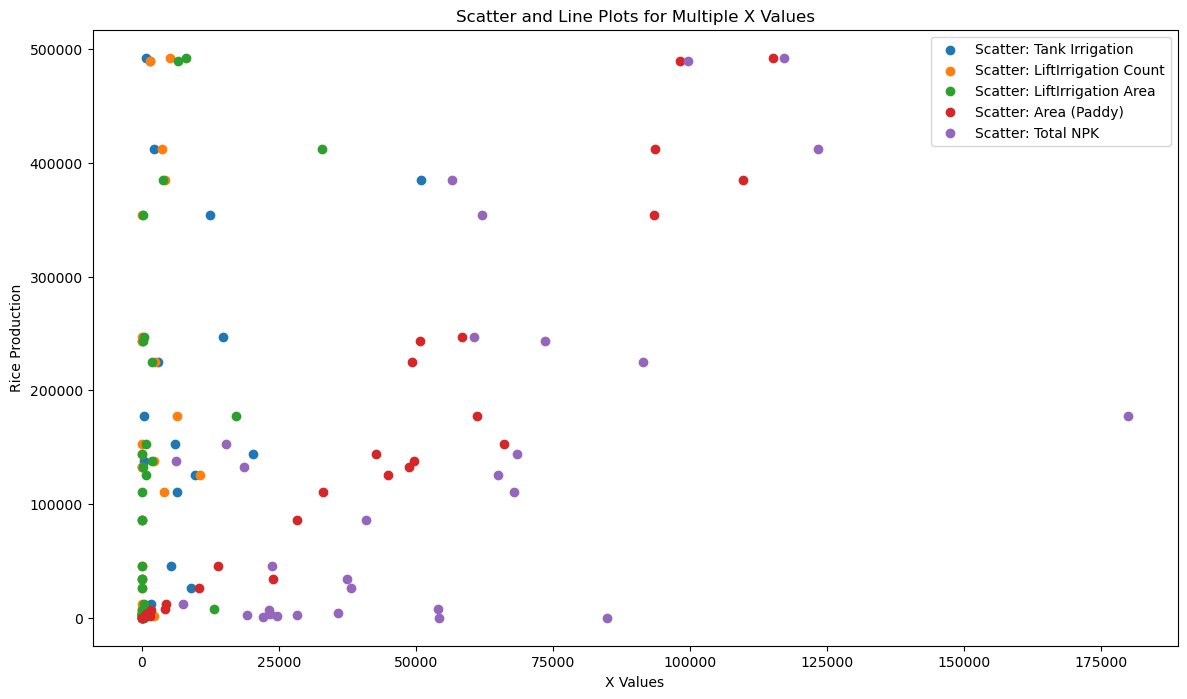

In [11]:

for parameter, column_name in zip(parameters, df_values.columns):
    if(column_name != 'Rice_Production'):
        df_values.rename(columns = {column_name: parameter}, inplace = True )

parameters = ['Tank Irrigation', 'LiftIrrigation Count',
              'LiftIrrigation Area', 'Area (Paddy)','Total NPK']

# List of x columns
x_columns = parameters
y_column = 'Rice_Production'

# Create a plot
plt.figure(figsize=(14, 8))

# Plot scatter and line for each x column
for x in x_columns:
    plt.scatter(df_values[x], df_values[y_column], label=f'Scatter: {x}')

# Adding title and labels
plt.title('Scatter and Line Plots for Multiple X Values')
plt.xlabel('X Values')
plt.ylabel('Rice Production')

# Adding legend
plt.legend()

# Show the plot
plt.show()


In [12]:
features_Belgaum = df_values[df_values['Division'] == 'Belgaum_division'].drop('Division', axis=1).drop('Rice_Production', axis = 1)
actual_values_Belgaum = df_values[df_values['Division'] == 'Belgaum_division']['Rice_Production']
train_features_Belgaum = sm.add_constant(features_Belgaum)

In [43]:
from sklearn.mixture import GaussianMixture

X = train_features_Belgaum.values
y = actual_values_Belgaum.values

gmm = GaussianMixture(n_components = 3, random_state = 0)
gmm.fit(X)

y_pred = gmm.predict(X)
print(y_pred)
new_samples, _ = gmm.sample(100)
print(new_samples)

[1 0 0 0 0 2 2]
[[ 9.99515688e-01  2.34160064e+02  2.61756604e+01  4.03905973e+02
   5.36225078e+03  7.97654876e+04]
 [ 1.00096075e+00  1.21086950e+02  9.95862981e+00  2.81081159e+01
  -5.56646993e+03  4.32728677e+04]
 [ 1.00024215e+00  7.03244985e+00  1.76170626e+00 -2.14910687e+01
   9.62983828e+01  4.94828943e+04]
 [ 9.99433560e-01  1.81224545e+02  1.52998591e+01  1.35730420e+02
   7.48280637e+03  4.22270785e+04]
 [ 9.99824613e-01  2.63862098e+02  1.84479815e+01  6.15180904e+01
  -1.42646857e+03  2.27998129e+04]
 [ 9.99004289e-01  8.11004580e+01  3.69238533e+00 -8.00130744e+01
   5.46692969e+03  2.39690337e+04]
 [ 9.99551362e-01  7.09357297e+01  8.37878998e+00  1.01186783e+02
   5.59793669e+03  5.56621547e+04]
 [ 9.99688636e-01 -4.06846817e+01 -1.64880341e+00  1.62440729e+01
   2.24538094e+04  4.76953860e+04]
 [ 9.99574607e-01  1.38664022e+02  1.21281474e+01  1.17725731e+02
   1.11252202e+04  4.35486894e+04]
 [ 1.00035363e+00  9.16875641e+01  1.43351993e+01  2.33431651e+02
  -6.0402

D:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [44]:
print(y)

[177552    170     85  33989   7258 125422 152981]


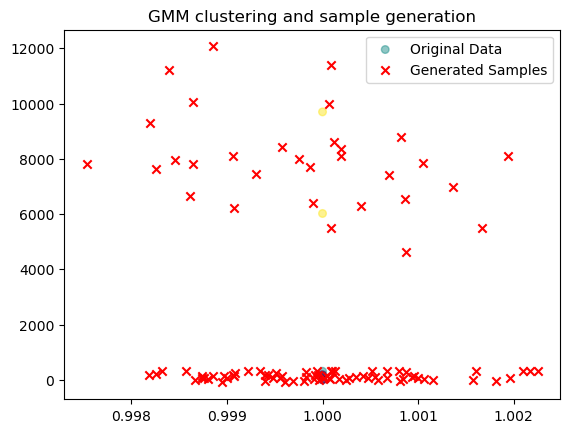

In [45]:
plt.scatter(X[:, 0], X[:, 1], c = y_pred, cmap='viridis', s=30, alpha = 0.5, label='Original Data')
plt.scatter(new_samples[:, 0], new_samples[:, 1], c= 'red', marker= 'x', label = 'Generated Samples')
plt.title('GMM clustering and sample generation')
plt.legend()
plt.show()